In [31]:
from tkinter import *
import os,numpy as np
from ResultAnalyser import ResultsComparison
from collections import Counter

In [104]:
def showResults():
    idx = [(v.get()==1) for v in var]
    selected = list(np.array(log_names)[idx])
    print(selected)
    if(len(selected)>0):
        res = ResultsComparison(selected)
        res.show()
    else:
         print("None selected ")   
def refreshList(var,labels,checkbuttons):
    log_names = os.listdir(log_dir)
    label_text = [x.split(' ')[0] for x in os.listdir(log_dir)]
    colors = color_similarity(label_text)
    var.clear()
    labels.clear()
    checkbuttons.clear()
    for i,text in enumerate(label_text):
        var1 = IntVar()
        lb = Label(window,text=text,bg=colors[i],font =('Verdana', 15),width=40).grid(column=1,row=i)
        lbt = Checkbutton(window, bg="white",variable=var1).grid(column=0,row=i)
        labels.append(lb)
        checkbuttons.append(lbt)
        var.append(var1)
        del lb,lbt,var1
def color_similarity(label_text):
    labs = [x.split('_')[0]+'_'+x.split('_')[1] if(len(x.split('_'))>1) else x for x in label_text ]
    col = list(np.arange(255,155,-100//len(Counter(labs))))
    label_color = np.array(['#%02x%02x%02x' % (255,255,255)]*len(labs))
    for k,c in zip(list(Counter(labs).keys()),col):
        idx = [l==k for l in labs]
        label_color[idx] = '#%02x%02x%02x' % (c, c, c)
    return list(label_color)

In [105]:
log_dir = '../../Adversarial Heart Sound Results/logs/'

window = Tk()
window.configure(background='black')
window.title("Welcome to LikeGeeks app")
window.minsize(300, 300) 

log_names = os.listdir(log_dir)
label_text = [x.split(' ')[0] for x in os.listdir(log_dir)]
var = []
labels = []
checkbuttons = []
refreshList(var,labels,checkbuttons)
button = Button(window, text='Show Result Comparison ', fg='white',bg='grey',
                font=('Verdana',15), command=showResults)
refreshButton = Button(window, text='Refresh', fg='white',bg='grey',
                font=('Verdana',12), command=lambda:refreshList(var,labels,checkbuttons))
button.grid(column=1)
refreshButton.grid(column=1)
window.mainloop()

In [82]:
labs = [x.split('_')[0]+'_'+x.split('_')[1] if(len(x.split('_'))>1) else x for x in label_text ]
print(labs)
col = list(np.arange(255,155,-100//len(Counter(labs))))
label_color = np.array(['#%02x%02x%02x' % (255,255,255)]*len(labs))
for k,c in zip(list(Counter(labs).keys()),col):
    idx = [l==k for l in labs]
    label_color[idx] = '#%02x%02x%02x' % (c, c, c)

['abcdefgh_i', 'abcdefgh_i', 'abcdefi_gh', 'abcdefi_gh', 'abdfi_c', 'abdf_c', 'abdf_c', 'bcdfghi_a', 'bcdfghi_a', 'bcdfi_a', 'bcdf_a', 'dann']


In [87]:
color_similarity(label_text)

['#ffffff',
 '#ffffff',
 '#f2f2f2',
 '#f2f2f2',
 '#e5e5e5',
 '#d8d8d8',
 '#d8d8d8',
 '#cbcbcb',
 '#cbcbcb',
 '#bebebe',
 '#b1b1b1',
 '#a4a4a4']

In [71]:
idx = [l=='abcdefgh_i' for l in labs]

In [79]:
label_color = np.array(['#%02x%02x%02x' % (255,255,255)]*len(labs))
label_color[idx] = '#%02x%02x%02x' % (0,0,0)

In [78]:
label_color

array(['#000000', '#000000', '#ffffff', '#ffffff', '#ffffff', '#ffffff',
       '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff'],
      dtype='<U7')

In [32]:
idx = [(v.get()==1) for v in var]
idx

[False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

3
[0 1 2 3 4]
[-1.  0.  1.]
abcdefgh_i
abcdefgh_i_tune_0.3
abcdefi_gh


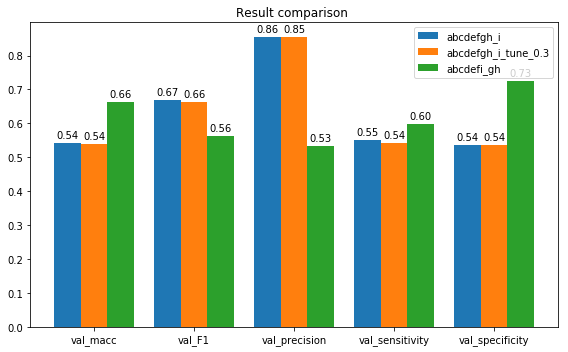

In [33]:
a = ResultsComparison([x for x in os.listdir(log_dir)][:3])
len(a.data)
a.show()